# Installing Labraries

In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install --upgrade matplotlib

In [ ]:
!pip install --upgrade kaggle

In [ ]:
!pip install --upgrade imbalanced-learn
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


## Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
import seaborn as sns
import joblib

# Downloading Kaggle Dataset Into Collab

#Step 1: Upload Kaggle API Key

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle (6).json to kaggle (6).json


# Step 2: Install Kaggle Library and Set API Key

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp "kaggle (6).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download Dataset

In [ ]:
!kaggle datasets download -d adrianmcmahon/imdb-india-movies

  0% 0.00/494k [00:00<?, ?B/s]
100% 494k/494k [00:00<00:00, 76.2MB/s]


# Step 4: Unzip the Dataset

In [ ]:
!unzip -q imdb-india-movies.zip -d imdb-india-movies

# Step 5: Unzip the Dataset

In [ ]:
!ls imdb-india-movies


'IMDb Movies India.csv'


# Importing Dataset

In [ ]:
dataset_path = 'imdb-india-movies/IMDb Movies India.csv'
codsost_set = pd.read_csv(dataset_path, encoding='ISO-8859-1')

In [ ]:
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Preprocessing

# 1. Basic Information:

In [ ]:
codsost_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# 4. Check for Missing Values:

In [ ]:
codsost_set.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# 2. View the First Few Rows:

In [ ]:
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### a) Handling Strategy: YEAR

In [ ]:

codsost_set['Year'] = codsost_set['Year'].astype(str).str.replace(r'\(|\)', '')

<ipython-input-12-0034bf626303>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  codsost_set['Year'] = codsost_set['Year'].astype(str).str.replace(r'\(|\)', '')


In [ ]:
codsost_set["Year"]

0         nan
1        2019
2        2021
3        2019
4        2010
         ... 
15504    1988
15505    1999
15506    2005
15507    1988
15508    1998
Name: Year, Length: 15509, dtype: object

In [ ]:
codsost_set['Year'] = codsost_set['Year'].str.strip('()')
codsost_set['Year'] = pd.to_numeric(codsost_set['Year'], errors='coerce')

In [ ]:
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Fill missing values with the median
codsoft_set_non = codsost_set[codsost_set['Year'].notna()]

In [ ]:
codsost_set['Year'] = codsost_set['Year'].fillna(codsoft_set_non['Year'].median())

In [ ]:
# Print or inspect the DataFrame
print(codsost_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None


### b) Handling Strategy: DURATION

In [ ]:
# Extract numeric part from 'Duration' and convert to numeric
codsost_set['Duration'] = pd.to_numeric(codsost_set['Duration'].str.extract('(\d+)', expand=False), errors='coerce')

# Print or inspect the DataFrame
print(codsost_set['Duration'])

0          NaN
1        109.0
2         90.0
3        110.0
4        105.0
         ...  
15504      NaN
15505    129.0
15506      NaN
15507      NaN
15508    130.0
Name: Duration, Length: 15509, dtype: float64


In [ ]:
# Fill missing values with the median
codsoft_set_non = codsost_set[codsost_set['Duration'].notna()]
codsost_set['Duration'] = codsost_set['Duration'].fillna(codsoft_set_non['Duration'].median())

In [ ]:
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### c) Handling Strategy: GENRE

Reasoning:
Since 'Genre' is a categorical variable, impute missing values with the mode (most frequent genre). This preserves the distribution of genres in the dataset.

In [ ]:
# Fill missing values with the median
codsost_set['Genre'] = codsost_set['Genre'].fillna(codsost_set['Genre'].mode()[0])

In [ ]:
# Display the cleaned DataFrame
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### d) Handling Strategy: RATING

Reasoning:
'Rating' is a numeric variable representing the movie rating. Impute the missing values with the median rating to maintain the central tendency of the data and minimize the impact of outliers.

In [ ]:
codsost_set.dtypes

Name         object
Year        float64
Duration    float64
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
# Fill missing values with the median
codsoft_set_non = codsost_set[codsost_set['Rating'].notna()]
codsost_set['Rating'] = codsost_set['Rating'].fillna(codsoft_set_non['Rating'].median())

In [ ]:
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### e) Handling Strategy: VOTES



Reasoning:
Convert 'Votes' to a numeric format and impute missing values with the median vote count to maintain the central tendency of the data.

In [ ]:
codsost_set['Votes'] = pd.to_numeric(codsost_set['Votes'].str.extract('(\d+)', expand=False), errors='coerce')

In [ ]:
# Fill missing values with the median
codsoft_set_non = codsost_set[codsost_set['Votes'].notna()]
codsost_set['Votes'] = codsost_set['Votes'].fillna(codsoft_set_non['Votes'].median())

In [ ]:
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
codsost_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  15509 non-null  float64
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     7920 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


### f) Handling Strategy: VOTES

Reasoning:
For categorical variables like 'Director' and 'Actors,' impute missing values with a special value (e.g., "Unknown") to maintain the information that data is missing. Alternatively, you might impute with the most frequent director or actor.

In [ ]:

codsost_set['Director'] = codsost_set['Director'].fillna(codsost_set['Director'].mode()[0])
codsost_set['Actor 1'] = codsost_set['Actor 1'].fillna(codsost_set['Actor 1'].mode()[0])
codsost_set['Actor 2'] = codsost_set['Actor 2'].fillna(codsost_set['Actor 2'].mode()[0])
codsost_set['Actor 3'] = codsost_set['Actor 3'].fillna(codsost_set['Actor 3'].mode()[0])

In [ ]:
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991.0,131.0,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
codsost_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      15509 non-null  float64
 2   Duration  15509 non-null  float64
 3   Genre     15509 non-null  object 
 4   Rating    15509 non-null  float64
 5   Votes     7920 non-null   float64
 6   Director  15509 non-null  object 
 7   Actor 1   15509 non-null  object 
 8   Actor 2   15509 non-null  object 
 9   Actor 3   15509 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [ ]:
codsost_set["Director"].unique

<bound method Series.unique of 0             J.S. Randhawa
1             Gaurav Bakshi
2        Soumyajit Majumdar
3                Ovais Khan
4              Amol Palekar
                ...        
15504         Mahendra Shah
15505            Kuku Kohli
15506            Kiran Thej
15507          Jayant Desai
15508          K.C. Bokadia
Name: Director, Length: 15509, dtype: object>

In [ ]:
codsost_set["Actor 1"].unique

<bound method Series.unique of 0                Manmauji
1            Rasika Dugal
2            Sayani Gupta
3                 Prateik
4            Rajat Kapoor
               ...       
15504    Naseeruddin Shah
15505        Akshay Kumar
15506     Sangeeta Tiwari
15507         Ashok Kumar
15508          Dharmendra
Name: Actor 1, Length: 15509, dtype: object>

In [ ]:
codsost_set["Actor 2"].unique

<bound method Series.unique of 0                    Birbal
1            Vivek Ghamande
2         Plabita Borthakur
3                Ishita Raj
4        Rituparna Sengupta
                ...        
15504         Sumeet Saigal
15505        Twinkle Khanna
15506                 Rekha
15507                 Rekha
15508            Jaya Prada
Name: Actor 2, Length: 15509, dtype: object>

In [ ]:
codsost_set["Actor 3"].unique

<bound method Series.unique of 0        Rajendra Bhatia
1          Arvind Jangid
2             Roy Angana
3        Siddhant Kapoor
4            Antara Mali
              ...       
15504      Suparna Anand
15505        Aruna Irani
15506               Pran
15507               Pran
15508        Arjun Sarja
Name: Actor 3, Length: 15509, dtype: object>

### g) Handling Strategy: NAMES

In [ ]:
codsost_set["Name"].unique

<bound method Series.unique of 0                                          
1        #Gadhvi (He thought he was Gandhi)
2                               #Homecoming
3                                   #Yaaram
4                         ...And Once Again
                        ...                
15504                   Zulm Ko Jala Doonga
15505                                 Zulmi
15506                             Zulmi Raj
15507                         Zulmi Shikari
15508                          Zulm-O-Sitam
Name: Name, Length: 15509, dtype: object>

In [ ]:
codsost_set['Name'] = codsost_set['Name'].str.replace('#', '')

In [ ]:
codsost_set["Name"].unique

<bound method Series.unique of 0                                         
1        Gadhvi (He thought he was Gandhi)
2                               Homecoming
3                                   Yaaram
4                        ...And Once Again
                       ...                
15504                  Zulm Ko Jala Doonga
15505                                Zulmi
15506                            Zulmi Raj
15507                        Zulmi Shikari
15508                         Zulm-O-Sitam
Name: Name, Length: 15509, dtype: object>

# 3. Summary Statistics:





In [ ]:
codsost_set.describe()

,Year,Duration,Rating,Votes
count,15509.000000,15509.000000,15509.000000,7920.000000
mean,1987.147979,129.658585,5.919131,101.663258
std,24.990727,19.805742,0.990512,181.816665
min,1913.000000,2.000000,1.100000,1.000000
25%,1969.000000,131.000000,6.000000,9.000000
50%,1991.000000,131.000000,6.000000,25.000000
75%,2008.000000,131.000000,6.000000,90.000000
max,2022.000000,321.000000,10.000000,999.000000


# 5. Check and Clean for Duplicates

In [ ]:
codsost_set.duplicated().sum()

6

In [ ]:
codsost_set = codsost_set.drop_duplicates()

In [ ]:
codsost_set.duplicated().sum()

0

# 6. Explore Categorical Variables:

In [ ]:
codsost_set['Genre'].value_counts()

Drama                         4655
Action                        1288
Thriller                       777
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [ ]:
codsost_set['Actor 1'].value_counts()

Ashok Kumar           1773
Jeetendra              140
Dharmendra             140
Mithun Chakraborty     133
Amitabh Bachchan       129
                      ... 
Vatsal Sheth             1
Ujala Baboria            1
Dimple Sewak             1
Komal Leels              1
Sangeeta Tiwari          1
Name: Actor 1, Length: 4718, dtype: int64

In [ ]:
codsost_set['Actor 2'].value_counts()

Rekha                 2464
Hema Malini             72
Mithun Chakraborty      63
Dharmendra              61
Helen                   48
                      ... 
Paris Keswani            1
Shubhangi Latkar         1
Amit Ghosh               1
Ayushi Singh             1
Sarah Jane Dias          1
Name: Actor 2, Length: 4891, dtype: int64

In [ ]:
codsost_set['Actor 3'].value_counts()

Pran              3231
Shakti Kapoor       65
Anupam Kher         64
Jeevan              59
Prem Chopra         52
                  ... 
Jafer Ali Khan       1
Kayamali             1
Kirit Shah           1
Sanil Khosla         1
Suparna Anand        1
Name: Actor 3, Length: 4820, dtype: int64

In [ ]:
codsost_set['Year'] = pd.to_numeric(codsost_set['Year'], errors='coerce').astype('Int64')

# Print or inspect the DataFrame
print(codsost_set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15503 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15503 non-null  object 
 1   Year      15503 non-null  Int64  
 2   Duration  15503 non-null  float64
 3   Genre     15503 non-null  object 
 4   Rating    15503 non-null  float64
 5   Votes     7920 non-null   float64
 6   Director  15503 non-null  object 
 7   Actor 1   15503 non-null  object 
 8   Actor 2   15503 non-null  object 
 9   Actor 3   15503 non-null  object 
dtypes: Int64(1), float64(3), object(6)
memory usage: 1.3+ MB
None


In [ ]:

codsost_set.to_csv('moviePrediction.csv', index=False)


# Data Visualization

# 1. Year with Best Rating:

In [ ]:
# Group by 'Year' and find the mean rating for each year
yearly_rating = codsost_set.groupby('Year')['Rating'].mean()

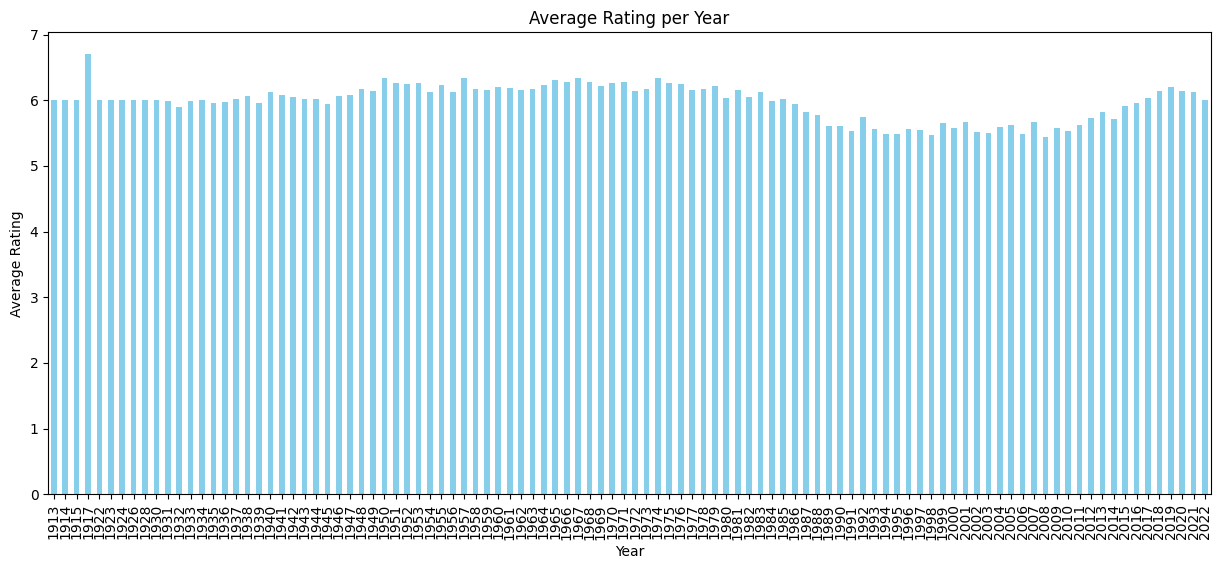

In [ ]:
# Plotting
plt.figure(figsize=(15, 6))
yearly_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# 2. Relationship between Duration and Rating:

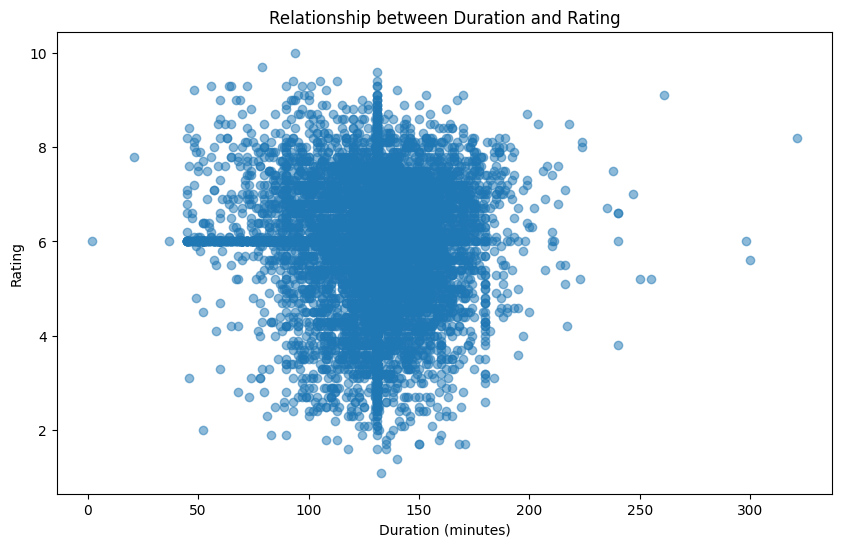

In [ ]:
# Scatter plot to visualize the relationship between 'Duration' and 'Rating'
plt.figure(figsize=(10, 6))
plt.scatter(codsost_set['Duration'], codsost_set['Rating'], alpha=0.5)
plt.title('Relationship between Duration and Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()


# 3. Top 10 Movies According to Rating:

In [ ]:
# Top 10 movies according to rating
top_10_movies = codsost_set.nlargest(10, 'Rating')[['Name', 'Year', 'Rating']]

# Display the result
print("Top 10 Movies According to Rating:")
print(top_10_movies)


Top 10 Movies According to Rating:
                      Name  Year  Rating
8339       Love Qubool Hai  2020    10.0
5410            Half Songs  2021     9.7
2563                 Breed  2020     9.6
5077          Gho Gho Rani  2019     9.4
6852                  June  2021     9.4
11704             Ram-Path  2017     9.4
14222  The Reluctant Crime  2020     9.4
1314          Ashok Vatika  2018     9.3
1729              Baikunth  2021     9.3
5125           God of gods  2019     9.3


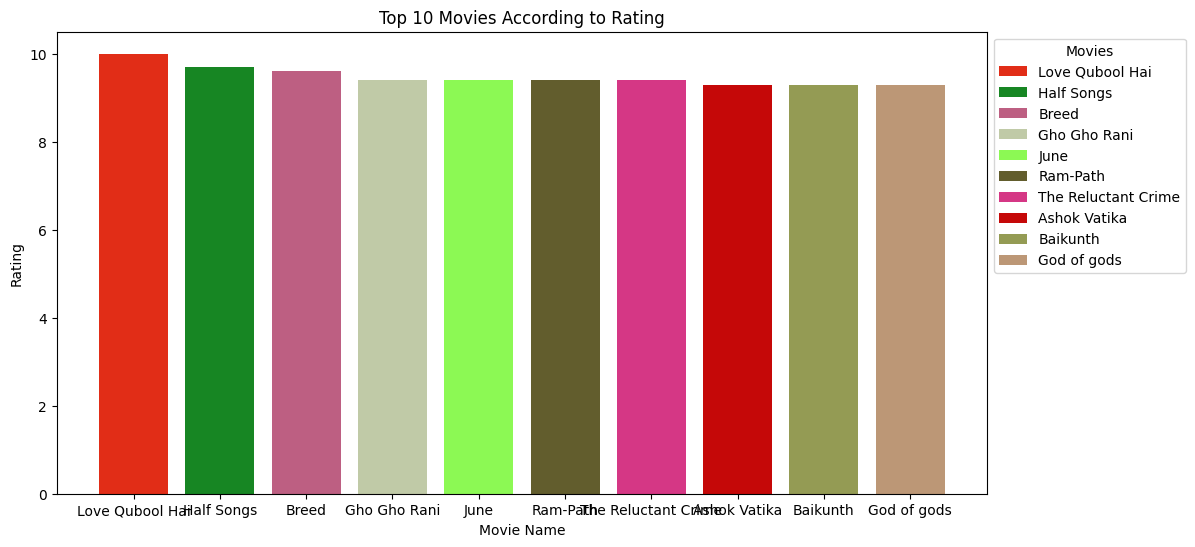

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


top_10_movies = codsost_set.nlargest(10, 'Rating')[['Name', 'Year', 'Rating']]

plt.figure(figsize=(12, 6))
colors = np.random.rand(10, 3)
bars = plt.bar(top_10_movies['Name'], top_10_movies['Rating'], color=colors)
plt.title('Top 10 Movies According to Rating')
plt.xlabel('Movie Name')
plt.ylabel('Rating')
plt.legend(bars, top_10_movies['Name'], title='Movies', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# 4. Number of Popular Movies Released Each Year:

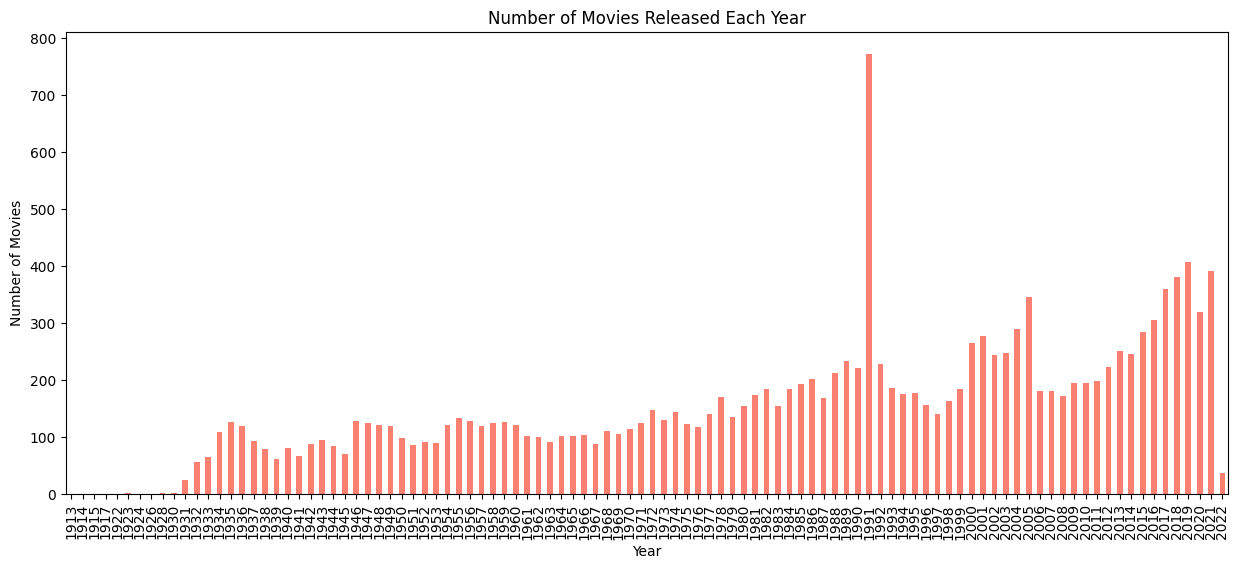

In [ ]:
# Count the number of movies each year
movies_per_year = codsost_set['Year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(15, 6))
movies_per_year.plot(kind='bar', color='salmon')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


# 5. Votes vs. Rating:

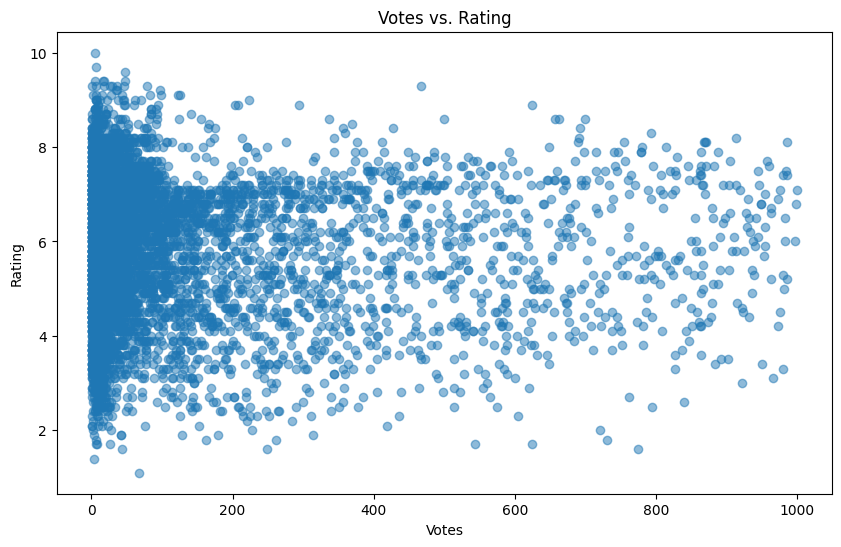

In [ ]:
# Scatter plot to visualize the relationship between 'Votes' and 'Rating'
plt.figure(figsize=(10, 6))
plt.scatter(codsost_set['Votes'], codsost_set['Rating'], alpha=0.5)
plt.title('Votes vs. Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


# 6. Director with the Most Movies:

In [ ]:
# Director with the most movies
most_movies_director = codsost_set['Director'].value_counts().idxmax()

# Display the result
print(f"The director with the most movies is: {most_movies_director}")


The director with the most movies is: Jayant Desai


# 7. Actor Starring in the Most Movies:

In [ ]:
# Actor starring in the most movies
most_movies_actor = codsost_set[['Actor 1', 'Actor 2', 'Actor 3']].stack().value_counts().idxmax()

# Display the result
print(f"The actor starring in the most movies is: {most_movies_actor}")


The actor starring in the most movies is: Pran


# 8. Relationship Between Rating and Number of Votes:

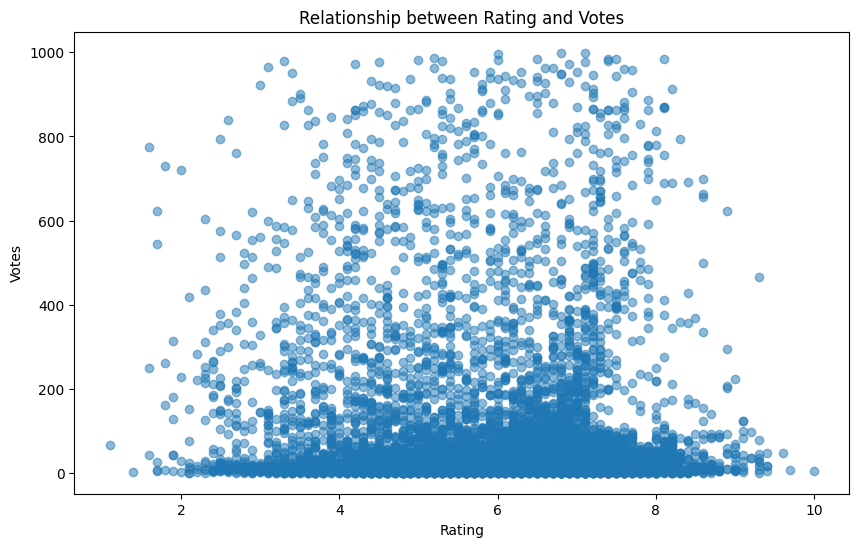

In [ ]:
# Scatter plot to visualize the relationship between 'Rating' and 'Votes'
plt.figure(figsize=(10, 6))
plt.scatter(codsost_set['Rating'], codsost_set['Votes'], alpha=0.5)
plt.title('Relationship between Rating and Votes')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()


# 10. Duration Distribution:

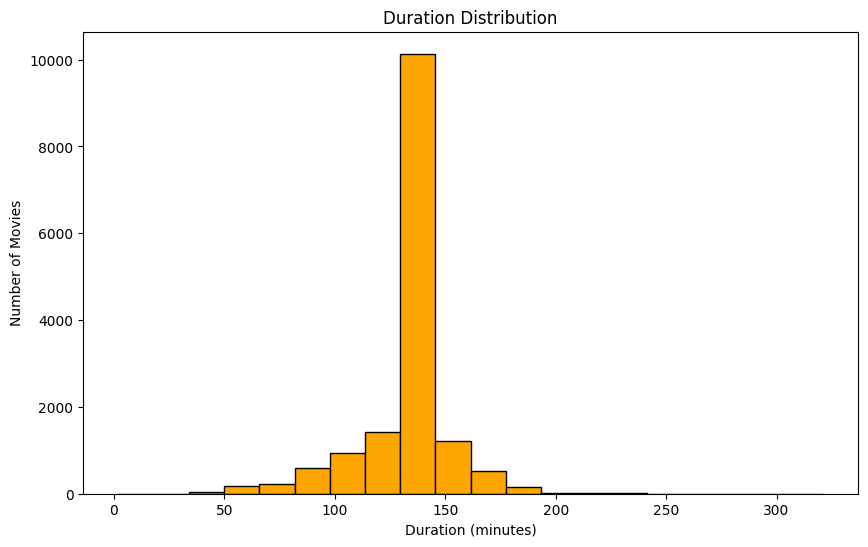

In [ ]:
# Histogram to visualize the distribution of movie durations
plt.figure(figsize=(10, 6))
plt.hist(codsost_set['Duration'].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


# 11. Top Directors Based on Average Rating:

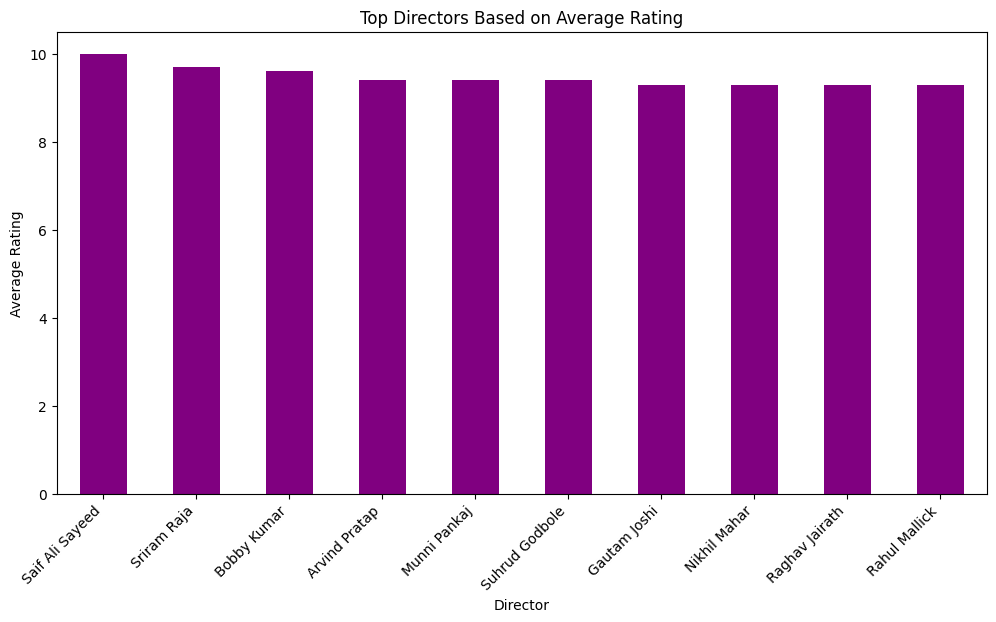

In [ ]:
# Group by director and calculate the average rating
director_avg_rating = codsost_set.groupby('Director')['Rating'].mean().nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
director_avg_rating.plot(kind='bar', color='purple')
plt.title('Top Directors Based on Average Rating')
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


# 12. Correlation Heatmap:

<ipython-input-61-95cc5a5fc985>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(codsost_set.corr(), annot=True, cmap='coolwarm', linewidths=.5)


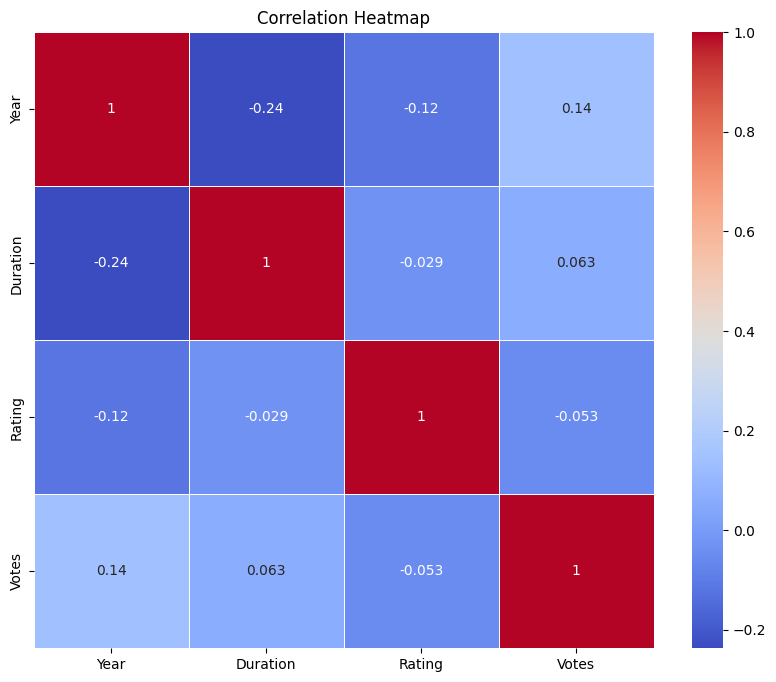

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(codsost_set.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 13. Rating Distribution:

<ipython-input-62-fd636309d35c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(x='Year', y='Rating', data=codsost_set, ci='sd', color='skyblue')


Text(0, 0.5, 'Average Rating')

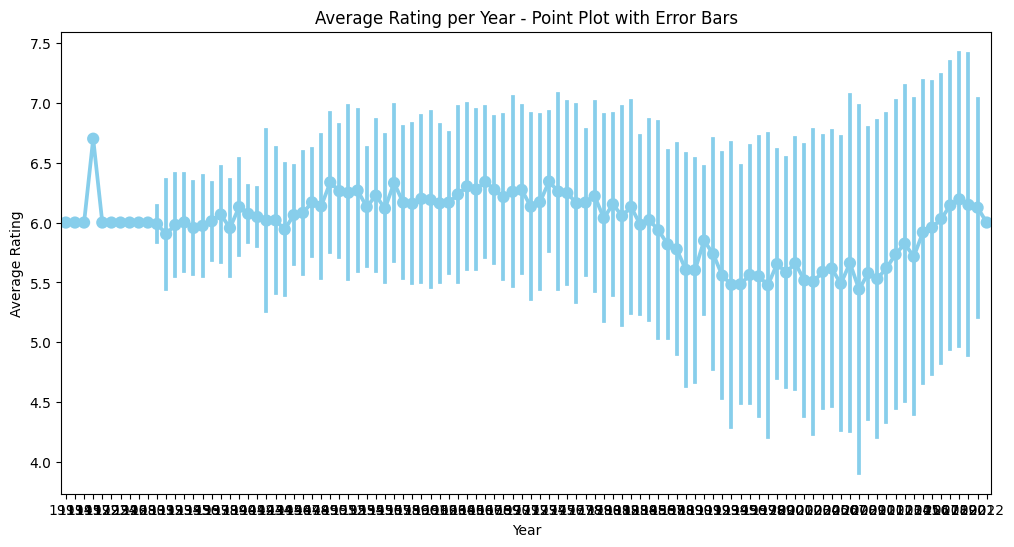

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='Year', y='Rating', data=codsost_set, ci='sd', color='skyblue')
plt.title('Average Rating per Year - Point Plot with Error Bars')
plt.xlabel('Year')
plt.ylabel('Average Rating')


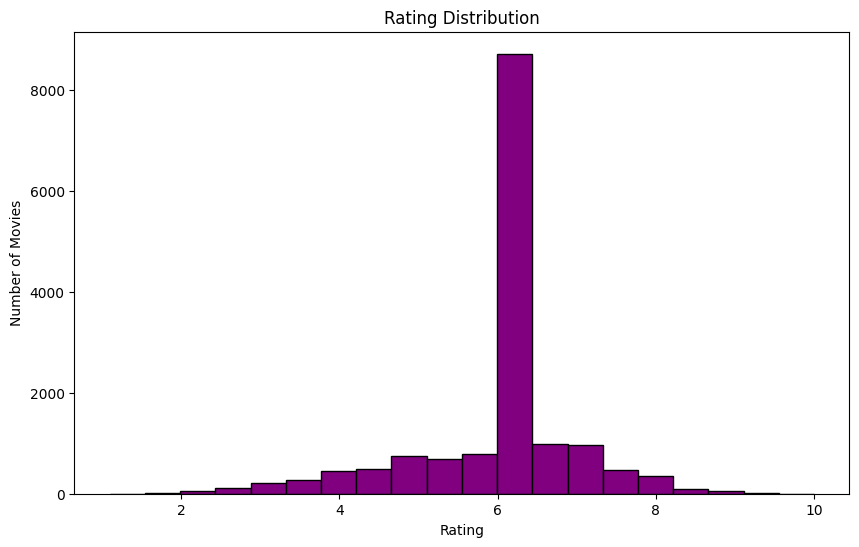

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(codsost_set['Rating'].dropna(), bins=20, color='purple', edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

# Label Encoder Instance

In [ ]:
codsost_set.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,1991,131.0,Drama,6.0,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,Homecoming,2021,90.0,"Drama, Musical",6.0,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,Drama,6.0,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding
codsost_set['Name_Label'] = label_encoder.fit_transform(codsost_set['Name'])
codsost_set['Genre_Label'] = label_encoder.fit_transform(codsost_set['Genre'])
codsost_set['Director_Label'] = label_encoder.fit_transform(codsost_set['Director'])
codsost_set['Actor1_Label'] = label_encoder.fit_transform(codsost_set['Actor 1'])
codsost_set['Actor2_Label'] = label_encoder.fit_transform(codsost_set['Actor 2'])
codsost_set['Actor3_Label'] = label_encoder.fit_transform(codsost_set['Actor 3'])



In [ ]:
# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Later, to load the label encoder
loaded_label_encoder = joblib.load('label_encoder.pkl')

In [ ]:
codsost_set['Genre'].unique()

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', 'Comedy, Drama, Fantasy', 'Comedy, Drama, Family',
       'Crime, Drama, Mystery', 'Horror, Thriller', 'Biography',
       'Comedy, Horror', 'Action', 'Drama, Horror, Mystery', 'Comedy',
       'Action, Thriller', 'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime

In [ ]:

# Save the encoder to a file
joblib.dump(encoder, 'encoder.joblib')

# Later, in your Streamlit app or any other script, load the encoder
loaded_encoder = joblib.load('encoder.joblib')

# Use the loaded encoder to encode new data
new_data_encoded = loaded_encoder.transform(new_data)

In [ ]:
codsost_set['Name_Label'] = label_encoder.fit_transform(codsost_set['Name'])
codsost_set.dtypes

Name               object
Year                Int64
Duration          float64
Genre              object
Rating            float64
Votes             float64
Director           object
Actor 1            object
Actor 2            object
Actor 3            object
Name_Label          int64
Genre_Label         int64
Director_Label      int64
Actor1_Label        int64
Actor2_Label        int64
Actor3_Label        int64
dtype: object

In [ ]:
codsost_set.dtypes

Name               object
Year                Int64
Duration          float64
Genre              object
Rating            float64
Votes             float64
Director           object
Actor 1            object
Actor 2            object
Actor 3            object
Name_Label          int64
Genre_Label         int64
Director_Label      int64
Actor1_Label        int64
Actor2_Label        int64
Actor3_Label        int64
dtype: object

In [ ]:
# Selecting only numeric columns
numeric_columns = codsost_set.select_dtypes(include=['number'])
numeric_columns


,Year,Duration,Rating,Votes,Name_Label,Genre_Label,Director_Label,Actor1_Label,Actor2_Label,Actor3_Label
0,1991,131.0,6.0,25.0,0,299,1926,2250,800,3108
1,2019,109.0,7.0,8.0,4285,299,1548,3280,4790,527
2,2021,90.0,6.0,25.0,5105,351,5123,3713,2866,3450
3,2019,110.0,4.4,35.0,13523,228,3319,2917,1504,4020
4,2010,105.0,6.0,25.0,4,299,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...,...
15504,1988,131.0,4.6,11.0,13831,0,2690,2586,4299,4262
15505,1999,129.0,4.5,655.0,13833,40,2499,227,4532,519
15506,2005,131.0,6.0,25.0,13834,0,2424,3609,3402,2847
15507,1988,131.0,6.0,25.0,13835,0,2034,636,3402,2847


In [ ]:
numeric_columns

,Year,Duration,Rating,Votes,Name_Label,Genre_Label,Director_Label,Actor1_Label,Actor2_Label,Actor3_Label
0,1991,131.0,6.0,25.0,0,299,1926,2250,800,3108
1,2019,109.0,7.0,8.0,4285,299,1548,3280,4790,527
2,2021,90.0,6.0,25.0,5105,351,5123,3713,2866,3450
3,2019,110.0,4.4,35.0,13523,228,3319,2917,1504,4020
4,2010,105.0,6.0,25.0,4,299,385,3112,3462,405
...,...,...,...,...,...,...,...,...,...,...
15504,1988,131.0,4.6,11.0,13831,0,2690,2586,4299,4262
15505,1999,129.0,4.5,655.0,13833,40,2499,227,4532,519
15506,2005,131.0,6.0,25.0,13834,0,2424,3609,3402,2847
15507,1988,131.0,6.0,25.0,13835,0,2034,636,3402,2847


In [ ]:
correlation_matrix = numeric_columns.corr()
correlation_with_target = correlation_matrix['Rating'].abs().sort_values(ascending=False)
correlation_with_target

Rating            1.000000
Year              0.117415
Genre_Label       0.105280
Votes             0.053118
Actor2_Label      0.039892
Actor3_Label      0.034908
Duration          0.029293
Director_Label    0.011522
Name_Label        0.009173
Actor1_Label      0.003510
Name: Rating, dtype: float64

In [ ]:
correlation_with_target

Rating            1.000000
Year              0.117415
Genre_Label       0.105280
Votes             0.053118
Actor2_Label      0.039892
Actor3_Label      0.034908
Duration          0.029293
Director_Label    0.011522
Name_Label        0.009173
Actor1_Label      0.003510
Name: Rating, dtype: float64

From the correlation coefficients, the values range from -1 to 1, where 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.

Based on the correlation coefficients you shared, it appears that Genre_Label and Votes have the highest positive correlations with Rating. However, the magnitudes of the correlations are relatively low, suggesting that the linear relationship between these features and the target variable (Rating) is not very strong.

# Model Building

# 1. Split the dataset into features (X) and the target variable (y).


In [ ]:
# Based on Corelation Coefficient 'Genre_Label' and 'Votes' are the chosen features
chosen_features = ['Genre_Label', 'Votes']

# Separate features (X) and target variable (y) with only the chosen features
X = codsost_set[chosen_features]
y = codsost_set['Rating']

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (15503, 2)
Shape of y: (15503,)


# 2. Split the data into training and testing sets.


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (12402, 2)
Shape of X_test: (3101, 2)
Shape of y_train: (12402,)
Shape of y_test: (3101,)


# 3. Standardize the features using StandardScaler.


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()



In [ ]:
# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

#4. Train a Linear Regression Model

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

import joblib

# path where I want to save the model file
model_path = '/content/linear_regression_model.pkl'

# Save the model
joblib.dump(model, model_path)

# Download the model file
from google.colab import files
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train.head()

,Genre_Label,Votes
10868,0,25.0
9800,392,25.0
12164,299,25.0
9425,460,11.0
15035,242,2.0


# 5. Make predictions on the test set.


In [ ]:
# Convert the predicted values to a DataFrame
y_pred_df = pd.DataFrame({'Predicted Rating': y_pred})

# Concatenate the predicted values, actual values, and features from X_test
result_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), y_pred_df], axis=1)

# Display the resulting DataFrame
result_df.head()

,Genre_Label,Votes,Rating,Predicted Rating
0,299,268.0,6.1,5.880960
1,29,77.0,3.6,5.759974
2,220,68.0,5.8,5.892257
3,0,25.0,6.0,5.757181
4,262,25.0,6.0,5.934638


# 6. Evaluate the model's performance using confusion matrix and classification report.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.9630255646846344
Coefficients: [ 0.00067732 -0.00032403]
Intercept: 5.765281854646329


Mean Squared Error (MSE):

The MSE is a measure of the average squared difference between the actual and predicted values.
In your case, the MSE is approximately 0.963.
A lower MSE indicates a better fit of the model to the data. In this context, it means that, on average, the squared difference between the predicted and actual ratings is around 0.963.
Coefficients: [0.00067732, -0.00032403]

Each coefficient represents the change in the predicted rating for a one-unit change in the corresponding feature, assuming all other features are constant.
The first coefficient (0.00067732) is associated with the first feature. A positive value suggests that an increase in this feature is associated with an increase in the predicted rating.
The second coefficient (-0.00032403) is associated with the second feature. A negative value suggests that an increase in this feature is associated with a decrease in the predicted rating.
Intercept: 5.765281854646329

The intercept is the constant term in the linear regression equation.
In this case, when all features are zero, the predicted rating is approximately 5.77.
The intercept represents the baseline rating, and the coefficients indicate how the rating changes based on the features.

Putting it together:

The model suggests that, on average, the predicted rating increases by about 0.00067732 units for a one-unit increase in the first feature and decreases by about 0.00032403 units for a one-unit increase in the second feature.
The baseline rating (intercept) is around 5.77.

# Ensemble Methods

# Initialize individual models

In [ ]:
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
ab_model = AdaBoostRegressor()

# Create a voting ensemble

In [ ]:
ensemble_model = VotingRegressor(estimators=[('rf', rf_model), ('gb', gb_model), ('ab', ab_model)])

# Train the ensemble model

In [ ]:
ensemble_model.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('gb', GradientBoostingRegressor()),
                            ('ab', AdaBoostRegressor())])

# Make predictions on the test set

In [ ]:

y_pred = ensemble_model.predict(X_test)
y_pred.to_csv('y_pred.csv', index=False)

# Evaluate the ensemble model

In [ ]:

mse = mean_squared_error(y_test, y_pred)
print("Ensemble Mean Squared Error:", mse)

Ensemble Mean Squared Error: 0.9029547573362695


The ensemble model, which combines predictions from multiple models, has an average squared error of approximately 0.8659. This means that, on average, the squared difference between the predicted and actual values is around 0.8659.
A lower MSE is generally desirable as it indicates better predictive performance. The specific context of your problem and the nature of the data should be considered when interpreting the MSE.

In [ ]:
Rating = codsost_set.copy()
Rating ['Rating'] = Rating ['Rating'].astype(int)


In [ ]:
Rating["Rating"].unique()

array([ 6,  7,  4,  5,  3,  8,  2,  9,  1, 10])

# GENRE, ACTOR AND DIRECTOR AS SUGGESTED ON THE

In [ ]:
numeric_columns.head()

,Year,Duration,Rating,Votes,Name_Label,Genre_Label,Director_Label,Actor1_Label,Actor2_Label,Actor3_Label
0,1991,131.0,6.0,25.0,0,299,1926,2250,800,3108
1,2019,109.0,7.0,8.0,4285,299,1548,3280,4790,527
2,2021,90.0,6.0,25.0,5105,351,5123,3713,2866,3450
3,2019,110.0,4.4,35.0,13523,228,3319,2917,1504,4020
4,2010,105.0,6.0,25.0,4,299,385,3112,3462,405


# 1. Split the dataset into features (X) and the target variable (y).


In [ ]:
# Based on Corelation Coefficient 'Genre_Label' and 'Votes' are the chosen features but this time we use what the project instructed
chosen_features = ['Genre_Label', 'Director_Label','Actor1_Label', 'Actor2_Label', 'Actor3_Label', 'Votes']

# Separate features (X) and target variable (y) with only the chosen features
X = codsost_set[chosen_features]
y = codsost_set['Rating']

# Display the shapes of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (15503, 6)
Shape of y: (15503,)


# 2. Split the data into training and testing sets.


In [ ]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (12402, 6)
Shape of X_test: (3101, 6)
Shape of y_train: (12402,)
Shape of y_test: (3101,)


# 3. Standardize the features using StandardScaler.


In [ ]:
X_test.to_csv('X_test.csv', index=False)
X_train.to_csv('X_train.csv', index=False)

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [ ]:
#X_train.to_csv('X_test.csv', index=False)

In [ ]:
X_test.head()

,Genre_Label,Director_Label,Actor1_Label,Actor2_Label,Actor3_Label,Votes
11935,299,725,1068,3435,4414,268.0
11402,29,1715,2402,4151,12,77.0
4924,220,748,578,2333,1604,68.0
15257,0,1356,3781,3033,4629,25.0
6708,262,5493,1678,3402,2847,25.0


#4. Train a Linear Regression Model

In [ ]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

import joblib

# Specify the path where you want to save the model file
model_path = '/content/linear_regress_model.pkl'

# Save the model
joblib.dump(model, model_path)

# Download the model file
from google.colab import files
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
X_train.head()

,Genre_Label,Director_Label,Actor1_Label,Actor2_Label,Actor3_Label,Votes
10868,0,1850,4150,1527,3297,25.0
9800,392,4871,4513,1462,2094,25.0
12164,299,2668,1471,1616,2159,25.0
9425,460,2304,3653,3402,2847,11.0
15035,242,3668,1879,4409,3863,2.0


# 5. Make predictions on the test set.


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Convert the predicted values to a DataFrame
y_pred_df = pd.DataFrame({'Predicted Rating': y_pred})

# Concatenate the predicted values, actual values, and features from X_test
result_df = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), y_pred_df], axis=1)

# Display the resulting DataFrame
result_df.head()

,Genre_Label,Director_Label,Actor1_Label,Actor2_Label,Actor3_Label,Votes,Rating,Predicted Rating
0,299,725,1068,3435,4414,268.0,6.1,5.950843
1,29,1715,2402,4151,12,77.0,3.6,5.760045
2,220,748,578,2333,1604,68.0,5.8,5.871618
3,0,1356,3781,3033,4629,25.0,6.0,5.830941
4,262,5493,1678,3402,2847,25.0,6.0,5.947753


# 6. Evaluate the model's performance using confusion matrix and classification report.

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.9608928657169731
Coefficients: [ 6.64809007e-04 -5.10695725e-06  4.33391822e-06  2.65454895e-05
  2.07192099e-05 -3.15049358e-04]
Intercept: 5.6529340939037604


Mean Squared Error (MSE):

The MSE is a measure of the average squared difference between the actual and predicted values.
In your case, the MSE is approximately 0.963.
A lower MSE indicates a better fit of the model to the data. In this context, it means that, on average, the squared difference between the predicted and actual ratings is around 0.963.
Coefficients: [0.00067732, -0.00032403]

Each coefficient represents the change in the predicted rating for a one-unit change in the corresponding feature, assuming all other features are constant.
The first coefficient (0.00067732) is associated with the first feature. A positive value suggests that an increase in this feature is associated with an increase in the predicted rating.
The second coefficient (-0.00032403) is associated with the second feature. A negative value suggests that an increase in this feature is associated with a decrease in the predicted rating.
Intercept: 5.765281854646329

The intercept is the constant term in the linear regression equation.
In this case, when all features are zero, the predicted rating is approximately 5.77.
The intercept represents the baseline rating, and the coefficients indicate how the rating changes based on the features.

Putting it together:

The model suggests that, on average, the predicted rating increases by about 0.00067732 units for a one-unit increase in the first feature and decreases by about 0.00032403 units for a one-unit increase in the second feature.
The baseline rating (intercept) is around 5.77.

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)


In [ ]:
r2

0.07636979781769881